# Homework set 4

Before you turn this problem in, make sure everything runs as expected (in the menubar, select Kernel → Restart Kernel and Run All Cells...).

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 27, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Loes Bijman 15211312

Sacha Gijsbers 12798525

# About imports
Please import the needed packages by yourself.

# Sparse matrices
A _sparse matrix_ or _sparse array_ is a matrix in which most of the elements are zero. There is no strict definition how many elements need to be zero for a matrix to be considered sparse. In many examples, the number of nonzeros per row or column is a small fraction, a few percent or less, of the total number of elements of the row or column. By contrast, if most of the elements are nonzero, then the matrix is considered _dense_. 

In the context of software for scientific computing, a sparse matrix typically refers to a storage format, in which elements which are known to be zero are not stored. In Python, the library `scipy.sparse` defines several sparse matrix classes, such as `scipy.sparse.csr_array`. To construct such an object, one passes for each nonzero element the value, and the row and column coordinates. In some cases, one can also just pass the nonzero (off-)diagonals, see `scipy.sparse.diags`.

Functions for dense matrices do not always work with sparse matrices. For example for the product of a sparse matrix with a (dense) vector, there is the member function `scipy.sparse.csr_array.dot`, and for solving linear equations involving a sparse matrix, there is the function `scipy.sparse.linalg.spsolve`.

In [1]:
# Import some basic packages
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
from scipy.sparse import csr_array

# This is how to create a sparse matrix from a given list of (row, column, value) tuples.
row  = [0,   3,   1,   0]
col  = [0,   3,   1,   2]
data = [4.0, 5.0, 7.0, 9.0]
M = csr_array((data, (row, col)), shape=(4, 4))

print("When printing a sparse matrix, it shows its nonzero entries:")
print(M)

print("If you want to see its `dense` matrix form, you have to use `mat.toarray()`:")
print(M.toarray())

# This is how to perform matrix-vector products.
x = np.array([1, 2, 3, 4])
print("For x={}, Mx = {}".format(x, M.dot(x)))

When printing a sparse matrix, it shows its nonzero entries:
  (0, 0)	4.0
  (0, 2)	9.0
  (1, 1)	7.0
  (3, 3)	5.0
If you want to see its `dense` matrix form, you have to use `mat.toarray()`:
[[4. 0. 9. 0.]
 [0. 7. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 5.]]
For x=[1 2 3 4], Mx = [31. 14.  0. 20.]


This matrix has values on its diagonal and on offdiagonals 1 and 2 rows ABOVE it.
[[1. 1. 1. 0.]
 [0. 2. 2. 2.]
 [0. 0. 3. 3.]
 [0. 0. 0. 4.]]
This matrix has values on its diagonal and on offdiagonals 1 and 2 rows BELOW it.
[[1. 0. 0. 0.]
 [1. 2. 0. 0.]
 [1. 2. 3. 0.]
 [0. 2. 3. 4.]]
If you want to visualize the matrix for yourself, use `plt.imshow`:


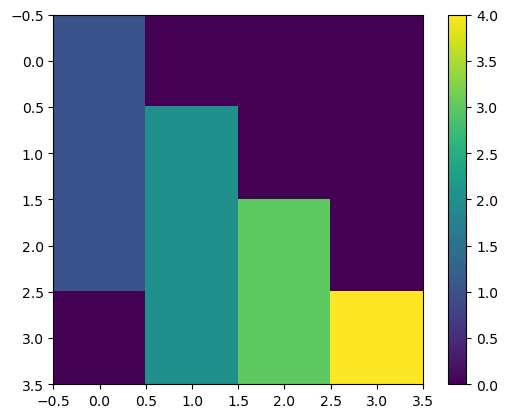

For b=[1 2 3 4], the solution x to Mx=b is [1.         0.5        0.33333333 0.5       ]
And indeed, Mx - b = [0. 0. 0. 0.]


In [3]:
from scipy.sparse import diags, SparseEfficiencyWarning
from scipy.sparse.linalg import spsolve
import warnings
warnings.simplefilter('ignore', SparseEfficiencyWarning)  # Suppress confusing warning

# This is how to create a sparse matrix from a given list of subdiagonals.
diagonals = [[1, 2, 3, 4], [1, 2, 3], [1, 2]]
M = diags(diagonals, [0, 1, 2])
print("This matrix has values on its diagonal and on offdiagonals 1 and 2 rows ABOVE it.")
print(M.toarray())

M = diags(diagonals, [0, -1, -2])
print("This matrix has values on its diagonal and on offdiagonals 1 and 2 rows BELOW it.")
print(M.toarray())

print("If you want to visualize the matrix for yourself, use `plt.imshow`:")
plt.imshow(M.toarray())
plt.colorbar()
plt.show()

# This is how to solve sparse systems.
b = np.array([1, 2, 3, 4])
x = spsolve(M, b)
print("For b={}, the solution x to Mx=b is {}".format(b, x))
print("And indeed, Mx - b = {}".format(M.dot(x) - b))

--------
# Exercise 1
Consider the following boundary value problem involving a nonlinear ordinary differential equation:

$$ \tag{1} y''(x) + \exp(y(x)) = 0, \quad 0 < x < 1, \quad y(0) = y(1) = 0.$$

The purpose of this exercise is to approximate the solution to this boundary value problem, by discretizing the problem and then solving the resulting system of nonlinear equations. 

Problem (1) will be discretized using finite differences. Suppose we use $n+2$ discretization points for $x$, denoted $x_k = kh$ for $k \in \{0, \ldots, n+1\}$ and $h = 1/(n+1)$. The approximate solution is denoted $y_k = y(x_k)$. 

We will use a _second-order central finite difference_ approximation for the second derivative: 

$$ \tag{2} y''(x_k) \approx \frac{y_{k-1} - 2 y_k + y_{k+1}}{h^2}.$$

The term $\exp(y(x_k))$ can simply be approximated by $\exp(y_k)$. Thus for $x=x_k$, equation (1) becomes

$$ \tag{3} \frac{y_{k-1} - 2 y_k + y_{k+1}}{h^2} + \exp y_k = 0, \quad k = 1, \ldots, n.$$

The boundary conditions (the conditions $y(0) = y(1) = 1$), lead to the requirement that $y_0 = y_{n+1} = 0$. To find the remaining values $y_k$, $k=1, \ldots, n$, equation (3) will be used for $k = 1, \ldots, n$. In this way, one obtains $n$ equations for $n$ unknowns, to which, in principle, a rootfinding method can be applied.

We will write $\vec y = \begin{bmatrix} y_1 \\ \vdots \\ y_n \end{bmatrix}$ for the vector of values to be determined. 


## (a)  (2 pts)
As a first step, finish the function `SecondDerMatrix` that returns a matrix $\bf{M}$ that maps the vector $\vec y$ to the vector of the approximate values $y''(x_k)$, $k=1, \ldots, n$ given in (2). To get full points for this part of the exercise you must create output in the form of a sparse matrix.

In [4]:
from scipy.sparse import csr_array

def SecondDerMatrix(n):
    '''
    Creates matrix M that maps any vector y to the vector of approximate values for the second derivative,
    using the finite differences approximation. This matrix assumes that the boundary conditions are 
    y(0) = y(1) = 0.
    Input: n(int), size of the matrix
    Output: sparse matrix M
    '''
    h = 1/(n+1)
    diagonals = [(n)*[-2], (n-1)*[1], (n-1)*[1]]
    M = diags(diagonals, [0, 1, -1])
    M /= h**2
    return M

print(SecondDerMatrix(8).toarray())

[[-162.   81.    0.    0.    0.    0.    0.    0.]
 [  81. -162.   81.    0.    0.    0.    0.    0.]
 [   0.   81. -162.   81.    0.    0.    0.    0.]
 [   0.    0.   81. -162.   81.    0.    0.    0.]
 [   0.    0.    0.   81. -162.   81.    0.    0.]
 [   0.    0.    0.    0.   81. -162.   81.    0.]
 [   0.    0.    0.    0.    0.   81. -162.   81.]
 [   0.    0.    0.    0.    0.    0.   81. -162.]]


## (b)  (1 pt)
Second-order central finite differences are exact for quadratic functions. In order to test your implementation, choose $n=10$ and apply the second derivative matrix from part (a) to a quadratic function $y(x)$ with $y(0) = y(1) = 0$ for which you know the second derivative $y''(x)$.

In [5]:
def QuadraticFunction(x):
    return 5*x**2 - 5*x

n = 10
h = 1/(n+1)

y = []
for k in range(1,n+1):
    x = k*h
    y.append(QuadraticFunction(x))

M = SecondDerMatrix(n)
print(M.toarray())
print(y)
print(M.dot(y))

[[-242.  121.    0.    0.    0.    0.    0.    0.    0.    0.]
 [ 121. -242.  121.    0.    0.    0.    0.    0.    0.    0.]
 [   0.  121. -242.  121.    0.    0.    0.    0.    0.    0.]
 [   0.    0.  121. -242.  121.    0.    0.    0.    0.    0.]
 [   0.    0.    0.  121. -242.  121.    0.    0.    0.    0.]
 [   0.    0.    0.    0.  121. -242.  121.    0.    0.    0.]
 [   0.    0.    0.    0.    0.  121. -242.  121.    0.    0.]
 [   0.    0.    0.    0.    0.    0.  121. -242.  121.    0.]
 [   0.    0.    0.    0.    0.    0.    0.  121. -242.  121.]
 [   0.    0.    0.    0.    0.    0.    0.    0.  121. -242.]]
[-0.41322314049586784, -0.7438016528925621, -0.9917355371900827, -1.15702479338843, -1.2396694214876034, -1.2396694214876034, -1.1570247933884295, -0.9917355371900829, -0.7438016528925613, -0.4132231404958677]
[10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]


## (c) (2 pts)

Defining $\vec y = \begin{bmatrix} y_1 \\ \vdots \\ y_n \end{bmatrix}$ and 
$E(\vec y) = \begin{bmatrix} \exp(y_1) \\ \vdots \\ \exp(y_n) \end{bmatrix}$, the equations (3) can be written in the form

$$ F(\vec y) := {\bf M} \cdot \vec y + E(\vec y) = \vec 0. $$

Finish the function `F` that defines $F(\vec y) = {\bf M} \cdot \vec y + E(\vec y)$.
Finish the function `JacobianF` that computes the Jacobian ${\bf J}_F(\vec y)$ of $F(\vec y)$.
To get full points for this part of the exercise, the Jacobian must be computed in the form of a sparse matrix.

In [17]:
def F(y):
    M = SecondDerMatrix(len(y))
    Ey = np.exp(np.array(y))
    return M.dot(y) + Ey

def JacobianF(y):
    n = len(y)
    h = 1/(n+1)
    diag_list = []
    for yi in y:
        diag_list.append((1/h**2)*(-2) + np.exp(yi))
    diagonals = [diag_list, (n-1)*[1/h**2], (n-1)*[1/h**2]]
    J = diags(diagonals, [0, 1, -1])
    return J

y = [1,2,3,2,1]
print(F(y))
print(JacobianF(y).toarray())

[  2.71828183   7.3890561  -51.91446308   7.3890561    2.71828183]
[[-69.28171817  36.           0.           0.           0.        ]
 [ 36.         -64.6109439   36.           0.           0.        ]
 [  0.          36.         -51.91446308  36.           0.        ]
 [  0.           0.          36.         -64.6109439   36.        ]
 [  0.           0.           0.          36.         -69.28171817]]


## (d)  (3 pts)
1. Write down the first order Taylor expansion $T_F(\vec y, \vec s)$ for $F(\vec y+\vec s)$.
2. In order to check your implementation of the Jacobian matrix, compute and print both $F(\vec y+\vec s)$ and its first order Taylor approximation $T_F(\vec y, \vec s)$ for a choice $\vec y$ and $\vec s$.
3. Verify numerically that the error $||F(\vec y + \vec s) - T_F(\vec y, \vec s)||_2$ is $\mathcal O(||\vec s||_2^2)$. Hint: take vectors $\vec s$ with $\|\vec s\|_2 = \mathcal O(h)$  for multiple values for $h$, e.g. $h = 10^{-k}$ for a range of $k$. 

Subquestion 1.

The first order Taylor expansion for $F(\vec y+\vec s)$ is given by: $F(\vec y+\vec s) \approx F(\vec y) + J_F(\vec y) \cdot \vec s$. Therefore, we have

\begin{align*}
    T_F(\vec y, \vec s) &= F(\vec y) + J_F(\vec y) \cdot \vec s \\
    &= {\bf M} \cdot \vec y + E(\vec y) + J_F(\vec y) \cdot \vec s \\
    &= \begin{bmatrix} \frac{1}{h^2}(-2y_1+y_2) \\ \frac{1}{h^2}(y_1-2y_2+y_3) \\ \vdots \\ \frac{1}{h^2}(y_{n-2}-2y_{n-1}+y_n)\\ \frac{1}{h^2}(y_{n-1}-2y_n)\end{bmatrix} + \begin{bmatrix} e^{y_1} \\ e^{y_2} \\ \vdots \\ e^{y_{n-1}}\\e^{y_n}\end{bmatrix} + \begin{bmatrix} \frac{2}{h^2} + e^{y_1} & \frac{1}{h^2} & 0 & \dots & 0 \\ \frac{1}{h^2} & \frac{2}{h^2} + e^{y_2} & \frac{1}{h^2} &\dots & 0 \\ 0 & \ddots & \ddots & \ddots &\vdots \\ \vdots & & \frac{1}{h^2} &\frac{2}{h^2} + e^{y_{n-1}} & \frac{1}{h^2}& \\ 0 & \dots & 0 & \frac{1}{h^2} & \frac{2}{h^2} + e^{y_n} \end{bmatrix} \begin{bmatrix} s_1 \\ s_2 \\ \vdots \\ s_{n-1} \\ s_n \end{bmatrix} \\
    &= {\bf M} \cdot \vec y + E(\vec y) + {\bf M}\cdot \vec s + E(\vec y)\cdot \vec s^T
\end{align*}


T_F(y,s) = [  2.38546465   7.46294666 -51.71360771   7.46294666   2.38546465]
F(y+s) = [  2.38560102   7.46331735 -51.71260007   7.46331735   2.38560102]
[0.9999999999999998, 0.009999999999999995, 0.0001, 1e-06, 1e-08, 1.0000000000000002e-10, 1e-12, 9.999999999999998e-15, 1.0000000000000001e-16, 1e-18, 1.0000000000000001e-20]
[485.50991502569156, 4.403382566259102, 0.043616858204482134, 0.00043575487691715163, 4.357135051294295e-06, 4.3563044426600625e-08, 4.3330658480417245e-10, 9.6611339270968e-12, 1.0180810756198736e-12, 6.77605788862772e-12, 9.10599483307802e-13]


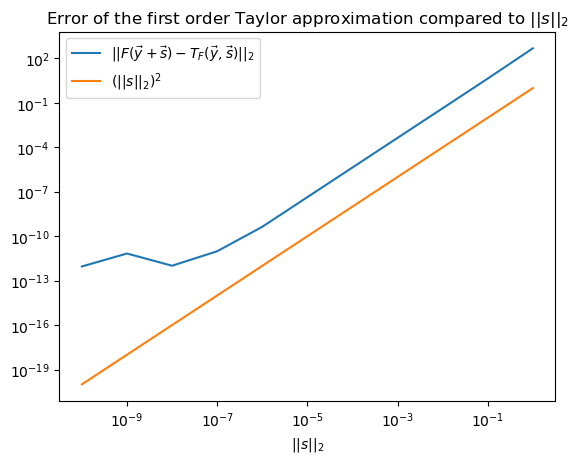

In [7]:
# Subquestions 2 and 3.

# 2
def T_F(y,s):
    return F(y) + JacobianF(y).dot(s)

# Veryify with a choice of y and s
y = np.array([1,2,3,2,1])
s = np.array([0.01,0.01,0.01,0.01,0.01])
print(f"T_F(y,s) = {T_F(y,s)}")
print(f"F(y+s) = {F(y+s)}")

# 3
n = 10 # length of s and y
y = np.array(range(0,n))
s = np.ones(n)
s_norm = np.linalg.norm(s)

error_list = []
norm_s_list = []
h_list = []

for k in range(0,11):
    h = 10**(-k)
    # create s with the right norm
    new_s = h/s_norm * s

    h_list.append(h)
    norm_s_list.append(np.linalg.norm(new_s)**2)
    error_list.append(np.linalg.norm(F(y+new_s) - T_F(y,new_s)))

print(norm_s_list)
print(error_list)

plt.loglog(h_list, error_list, label = '$|| F(\\vec y +\\vec s) - T_F(\\vec y,\\vec s)||_2$')
plt.loglog(h_list, norm_s_list, label = '$(||s||_2)^2$')
plt.xlabel('$||s||_2$')
plt.title('Error of the first order Taylor approximation compared to $||s||_2$')
plt.legend()
plt.show()

## (e) (2 pts)
1. Finish the function `NewtonSolve` below to solve the system of equations.
2. Take $n=40$, and experiment with your function. Try to find a choice of `y0` such that the method doesn't converge, as well as a choice of `y0` such that the method converges. In your answer, list the types of convergence behavior you found. Show a convergent example (if you found any) and a nonconvergent example (if you found any). Show the solutions you found for each example.

In [15]:
# Subquestion 1.
def NewtonSolve(y0, K):
    """ Use Newton's method to solve F(y) = 0 with initial guess y0 and K iterations. 
    Input: y0 (initial guess), K 9number of iterations
    Output: approximate solution to the root problem """
    y = y0
    newton_iterations = []
    for _ in range(K):
        sk = spsolve(JacobianF(y), -F(y))
        y += sk
        newton_iterations.append(np.linalg.norm(y))
    return y,newton_iterations

y0 = [1,2,1]
K = 10
print(NewtonSolve(y0,K))

(array([0.10544867, 0.14144676, 0.10544867]), [1.3105006689808303, 0.15731114883711553, 0.20544229052823915, 0.20553838885786144, 0.205538389248722, 0.20553838924872203, 0.205538389248722, 0.20553838924872203, 0.205538389248722, 0.20553838924872203])


/var/folders/wr/_f23fm512gg3qhxthyg30lvc0000gn/T/ipykernel_87228/3664664084.py:11: RuntimeWarning: overflow encountered in exp
  diag_list.append((1/h**2)*(-2) + np.exp(yi))
/var/folders/wr/_f23fm512gg3qhxthyg30lvc0000gn/T/ipykernel_87228/3664664084.py:3: RuntimeWarning: overflow encountered in exp
  Ey = np.exp(np.array(y))


[nan nan nan nan]
[ 2.22044605e-16 -2.22044605e-16 -2.22044605e-16  2.22044605e-16]
[ 1.77635684e-15  7.10542736e-15 -2.13162821e-14 -1.68753900e-14]
[2.66470910e+16 5.54755721e+38 1.36327888e+19 5.12908360e+08]


(0.001, 1000)

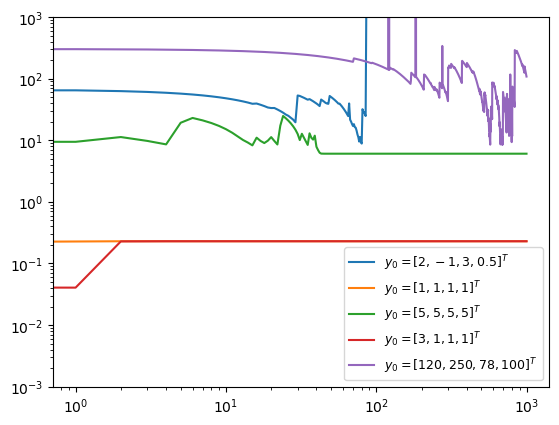

In [61]:
# Subquestion 2, code part

y0_0 = [2, -1, 3, 0.5]
y0_1 = np.ones(4)
y0_2 = [5,5,5,5]
y0_3 = [3,1,1,1]
y0_4 = [120,250,78,100]

K = 1000

newton_iterations = []

y0,newton_iterations = NewtonSolve(y0_0, K)
y1, newton_iterations_1 = NewtonSolve(y0_1, K)
y2, newton_iterations_2 = NewtonSolve(y0_2, K)
y3, newton_iterations_3 = NewtonSolve(y0_3, K)
y4, newton_iterations_4 = NewtonSolve(y0_4, K)

print(F(y0))
print(F(y1))
print(F(y2))
print(F(y4))

plt.loglog(range(K), newton_iterations, label = '$y_0 = [2,-1,3,0.5]^T$')
plt.loglog(range(K), newton_iterations_1, label = '$y_0 = [1,1,1,1]^T$')
plt.loglog(range(K), newton_iterations_2, label = '$y_0 = [5,5,5,5]^T$')
plt.loglog(range(K), newton_iterations_3, label = '$y_0 = [3,1,1,1]^T$')
plt.loglog(range(K), newton_iterations_4, label = '$y_0 = [120,250,78,100]^T$')
plt.legend(fontsize=9)
plt.ylim(10**(-3),10**3)

quadratic convergence? linear convergence and divergence?